# Analisis de Resultados Entregados por el Optimizador

In [2]:
# Importamos las librerías
from os import path, listdir, getcwd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Creamos los dataframes con los archivos 
# Sacamos todos los archivos de la carpeta resultados
def pilot_nodos(system):
    if system=='ieee9':
        pilot_nodes = [3,4,5,6,7,8]
        return pilot_nodes
    elif system=='ieee39':
        pilot_nodes = [1,25,7,5,22,18]
        return pilot_nodes
    elif system=='ieee57':
        pilot_nodes = [0,3,9,11,12,21,28,30,35,40,47]
        return pilot_nodes
    elif system=='ieee118':
        pilot_nodes = [68,4,36,55,76,65,45,22,11,69,16,62,79,7,48,31]
        return pilot_nodes
def graph_plot(res, system, folder):
    for i in range(1,9):
        dict_res = {}
        for name, dict_df in res.items():
            if f'_area_{i}' in name:
                dict_res[name] = dict_df
        if len(dict_res):
            T = [t for t in range(1,25)]
            for name, dict_df in dict_res.items():
                for trafo, value in dict_df.items():
                    if len(value):
                        fig = plt.subplots(figsize =(10, 6)) 
                        # Make the plot
                        plt.plot(T, value, color='b', label=f'{name} - {trafo}')
                        # Adding Xticks
                        plt.title(f'Resultados del área {i}', fontweight ='bold', fontsize = 15)
                        plt.xlabel('Periodos', fontweight ='bold', fontsize = 15)
                        plt.ylabel(name.replace('Var_',''), fontweight ='bold', fontsize = 15)
                        plt.legend()
                        plt.grid()
                        plt.savefig(folder+f'\{system}\{name}_{trafo}.png')
        else:
            break
def graph_bar(res, system, folder):
    # set width of bar
    for i in range(1,9):
        dict_res = {}
        for name, dict_df in res.items():
            if f'_area_{i}' in name:
                dict_res[name] = dict_df 
        if len(dict_res):
            barWidth = 0.25
            fig = plt.subplots(figsize =(10, 6)) 
            # set height of ba
            k = 0
            color = ['r', 'g']
            for name, dict_df in dict_res.items():
                values_pq = [sum(dict_df.get(t)) for t in range(1,25)]
                # Set position of bar on X axis
                br = [x + k*barWidth for x in np.arange(len(values_pq))]
                # Make the plot
                plt.bar(br, values_pq, color=color[k], width = barWidth,
                        edgecolor ='grey', label =name)
                k+=1 
            # Adding Xticks
            plt.title(f'Resultados del área {i}', fontweight ='bold', fontsize = 15)
            plt.xlabel('Periodos', fontweight ='bold', fontsize = 15)
            plt.ylabel('PQ [MVar]', fontweight ='bold', fontsize = 15)
            plt.xticks([r + barWidth for r in range(len(values_pq))],
                    [str(t) for t in range(1,25)])
            plt.legend()
            plt.savefig(folder+f'\{system}\{name}.png')
        else:
            break
def graph_plot_2(res, system, folder):
    for i in range(1,9):
        dict_res = {}
        for name, dict_df in res.items():
            if f'_area_{i}' in name:
                dict_res[name] = dict_df 
        if len(dict_res):
            T = [t for t in range(1,25)]
            pilot_nodes = pilot_nodos(system)
            color = ['r*', 'g.']
            nodos_pilotos_area = []
            for name, dict_df in dict_res.items():
                for node in pilot_nodes:
                    if dict_df.get(str(node)):
                        nodos_pilotos_area.append(node)
                break
            for node in nodos_pilotos_area:
                fig = plt.subplots(figsize =(10, 6))
                k = 0
                for name, dict_df in dict_res.items():
                    # Make the plot 
                    plt.plot(T, dict_df.get(str(node)), color[k], label=f'{name} - {node}')
                    k+=1
                plt.title(f'Resultados del área {i}', fontweight ='bold', fontsize = 15)
                plt.xlabel('Periodos', fontweight ='bold', fontsize = 15)
                plt.ylabel(f'Tensiones [p.u.]', fontweight ='bold', fontsize = 15)
                plt.legend()
                plt.grid()
                plt.savefig(folder+f'\{system}\{name}_{node}.png')
        else:
            break

In [59]:
def get_dict_name(system):
    dict_names = {}
    dirname = path.dirname(getcwd())
    for arc in listdir(f'{dirname}/ResultadosAreas/{system}'):
        name = arc.split('__')[0]
        for i in range(1,8):
            name = name.replace(f'_area_{i}','')
        if dict_names.get(name):
            dict_names.get(name).append(arc)
        else:
            dict_names[name] = [arc]
    return dirname, dict_names
def get_df(var, system):
    dirname, dict_names = get_dict_name(system)
    names_files = dict_names.get(var)
    dict_df = {}
    names_files.sort()
    for name in names_files:
        df = read_csv(f'{dirname}/ResultadosAreas/{system}/{name}')
        dict_df[name.replace('.csv', '')] = df
    res_dict = {}
    if 'Var_V_Vbus' == var:
        for name,df in dict_df.items():
            dict_df_aux = dict((df.iloc[i][0], df.iloc[i][1]) for i in range(df.shape[0]))
            t_aux = {}
            for key, value in dict_df_aux.items():
                bus = key.split("'")[1]
                if t_aux.get(bus):
                    t_aux.get(bus).append(value)
                else:
                    t_aux[bus] = [value]
            res_dict[name] = t_aux
    elif var in ['Var_V_Shunt', 'Var_V_Rtrafo']:
        for name, df in dict_df.items():
            t_aux = {}
            dict_df_aux = dict((df.iloc[i][0], df.iloc[i][1]) for i in range(df.shape[0]))
            for key, value in dict_df_aux.items():
                bus = key.split("'")[1]
                if t_aux.get(bus):
                    t_aux.get(bus).append(value)
                else:
                    t_aux[bus] = [value]
            res_dict[name] = t_aux
    else:
        for name,df in dict_df.items():
            dict_df_aux = dict((df.iloc[i][0], df.iloc[i][1]) for i in range(df.shape[0]))
            t_aux = dict((t,[]) for t in range(1,25))
            for key, value in dict_df_aux.items():
                t = key.split(',')[1].replace(')','')
                t_aux.get(int(t)).append(value)
            res_dict[name] = t_aux
    return res_dict


C:\Users\nensa\AppData\Local\Temp\ipykernel_18648\1714936014.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.subplots(figsize =(10, 6))


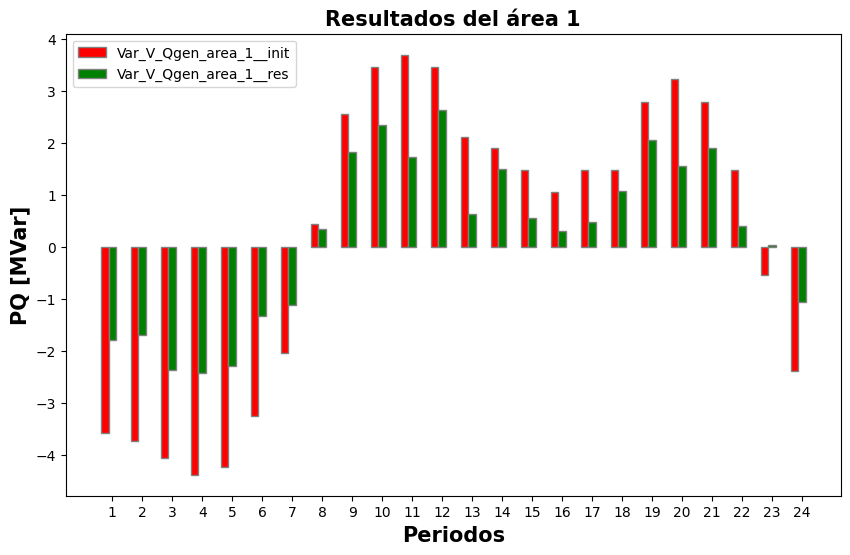

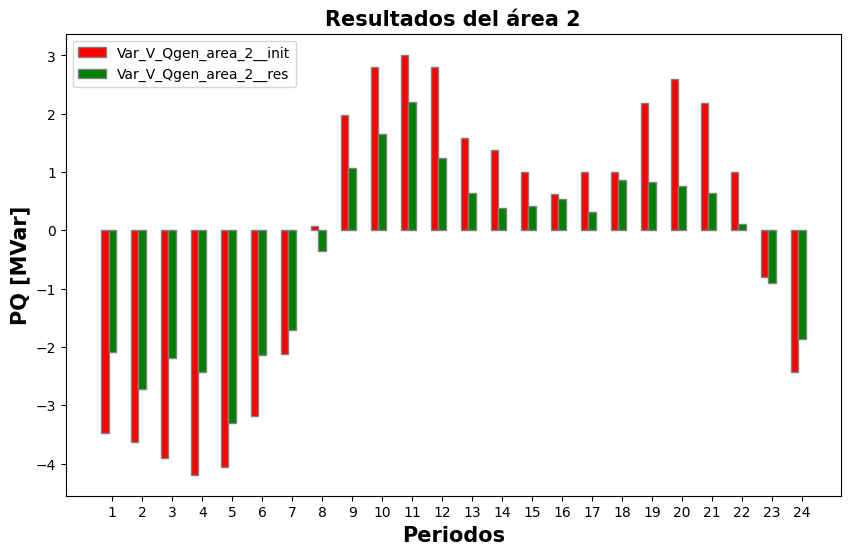

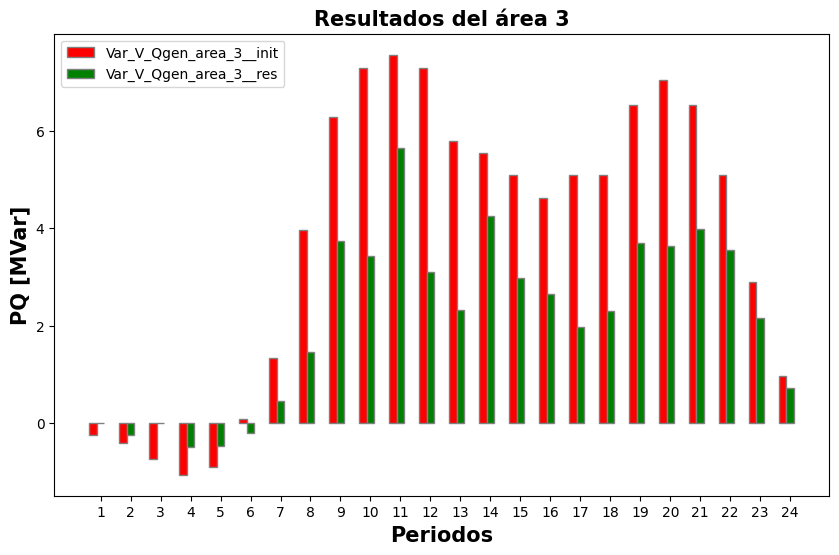

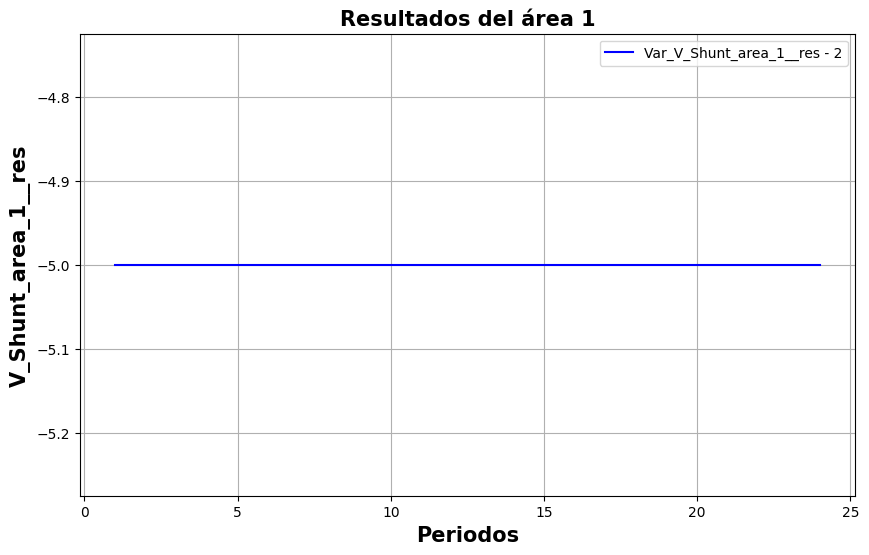

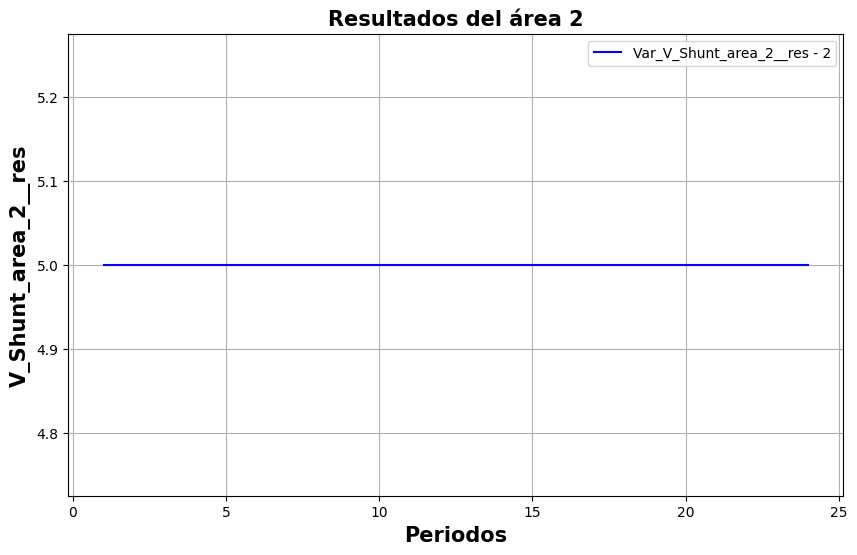

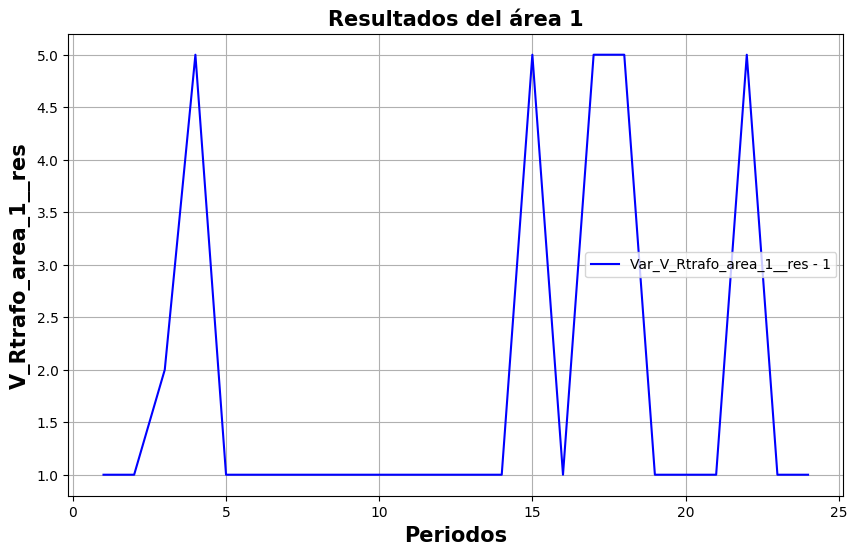

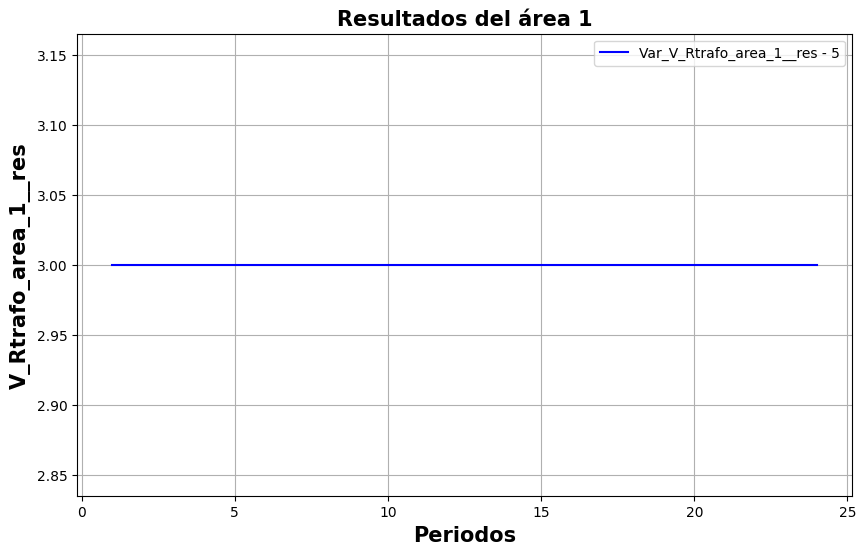

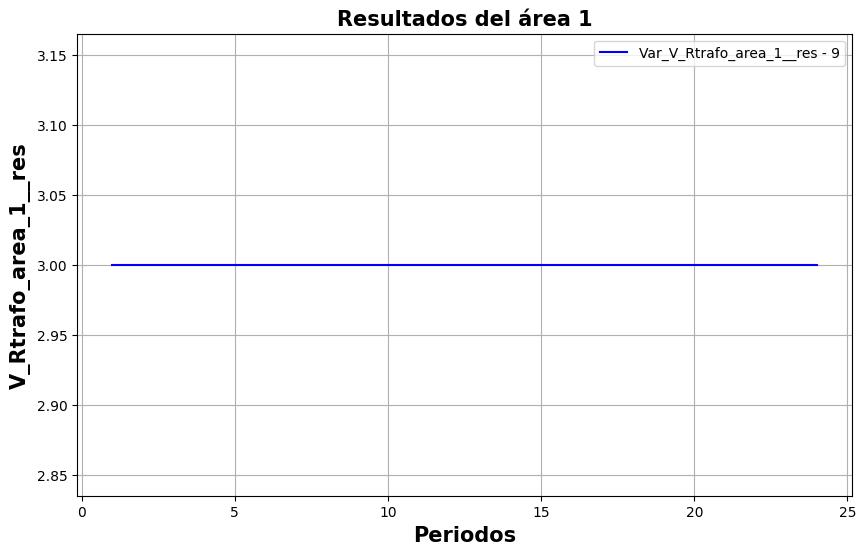

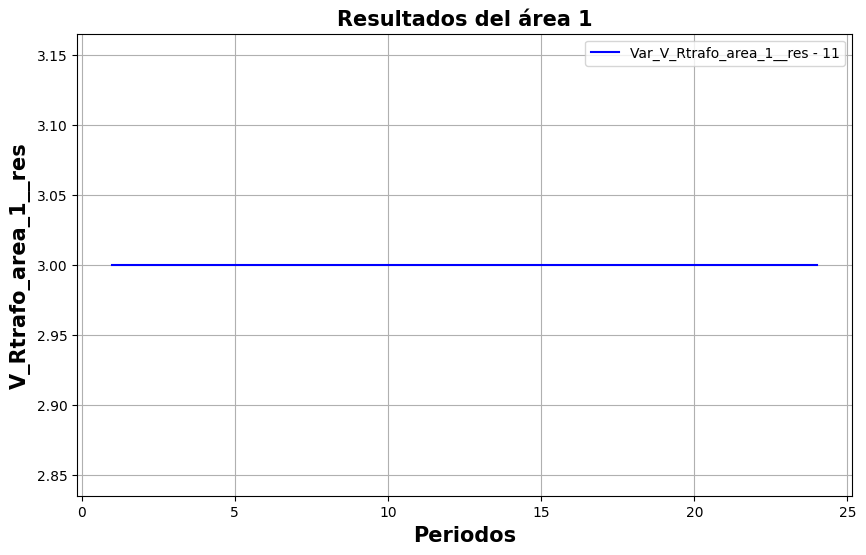

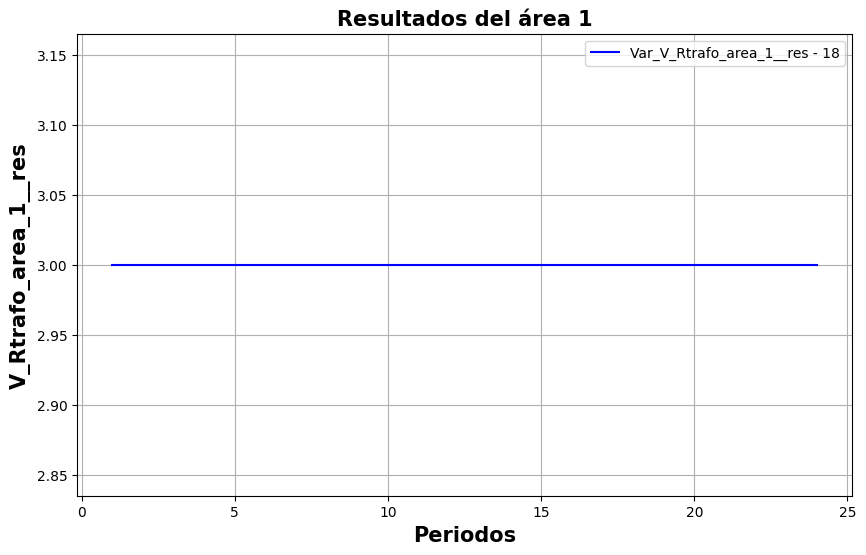

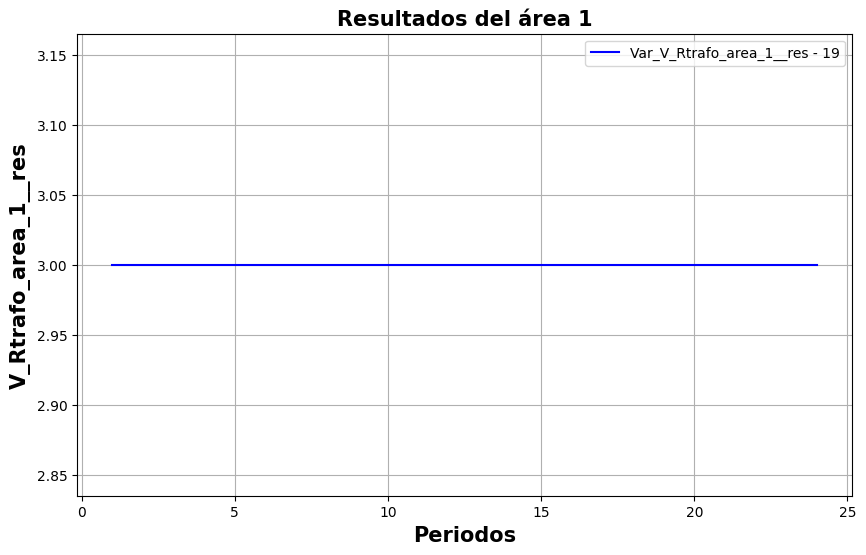

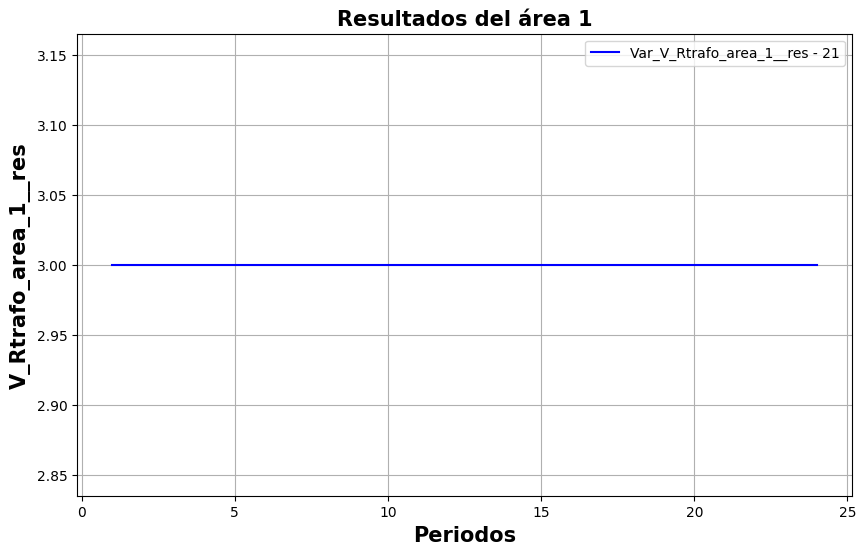

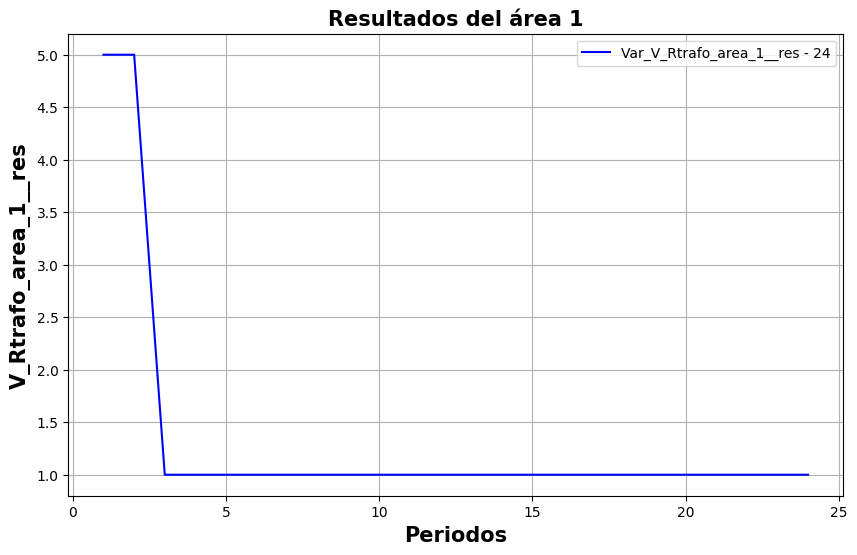

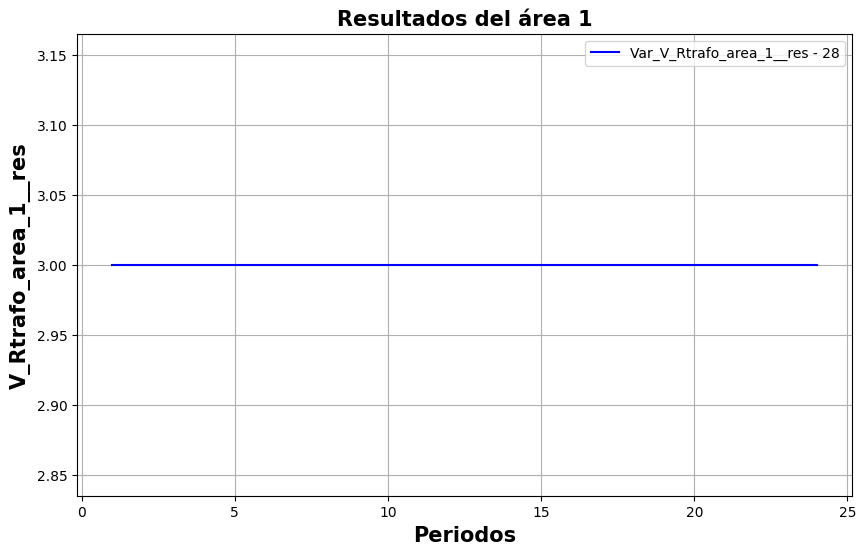

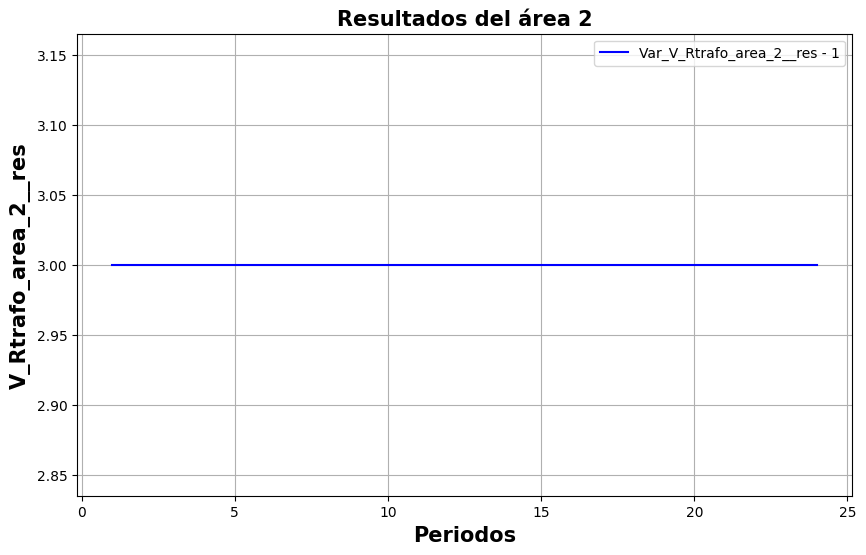

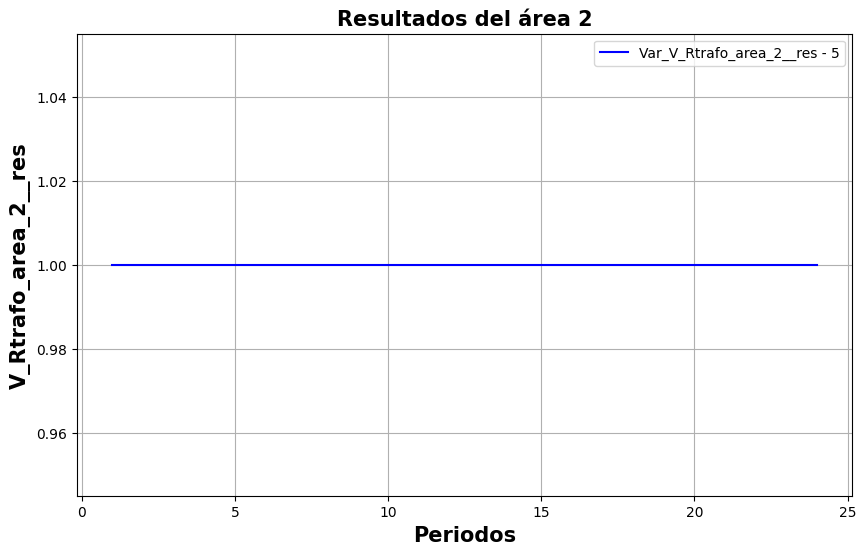

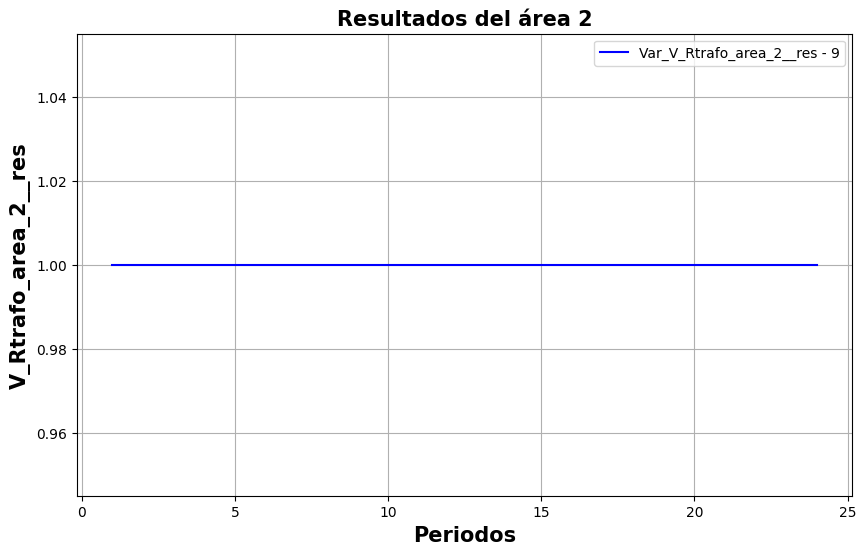

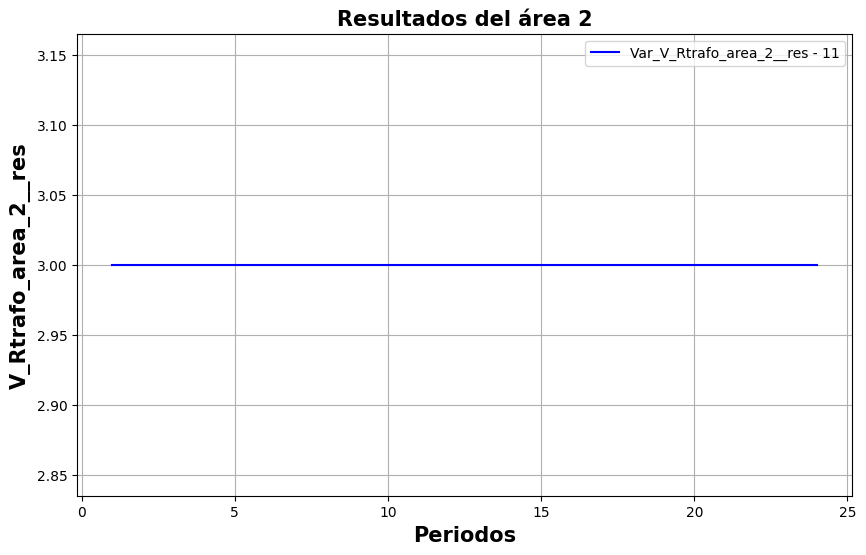

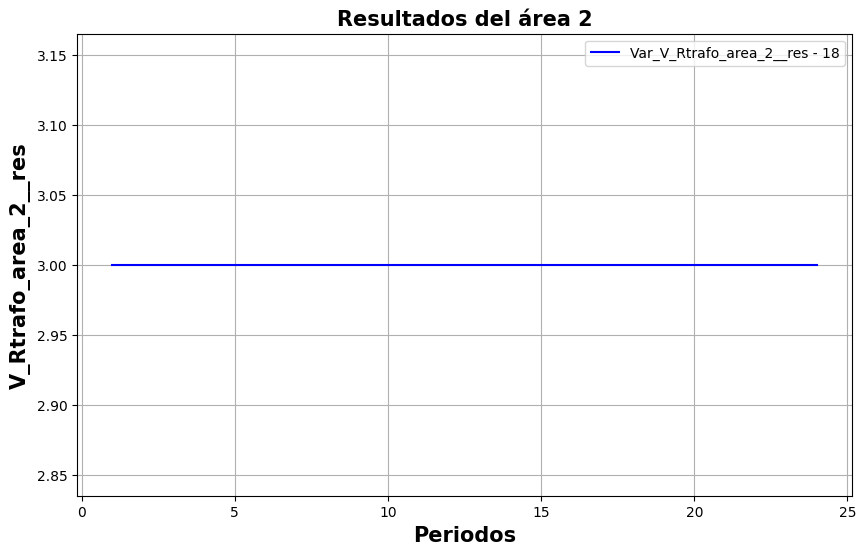

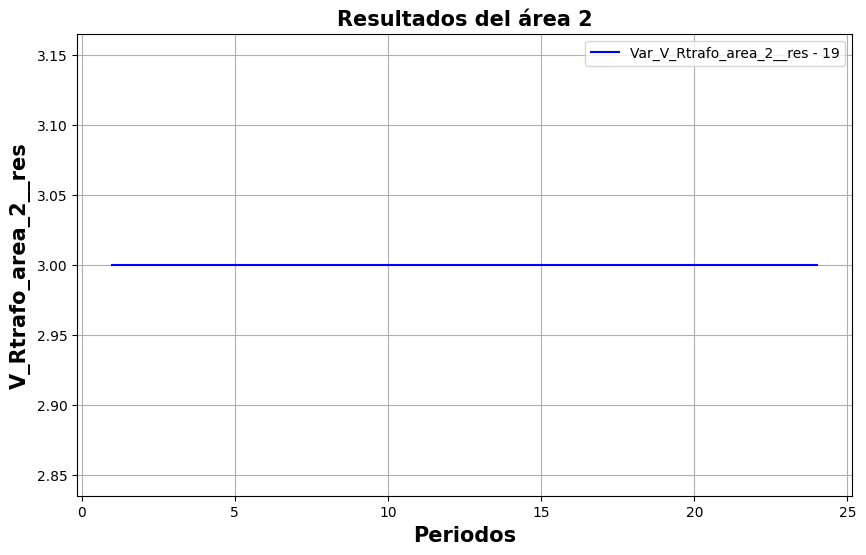

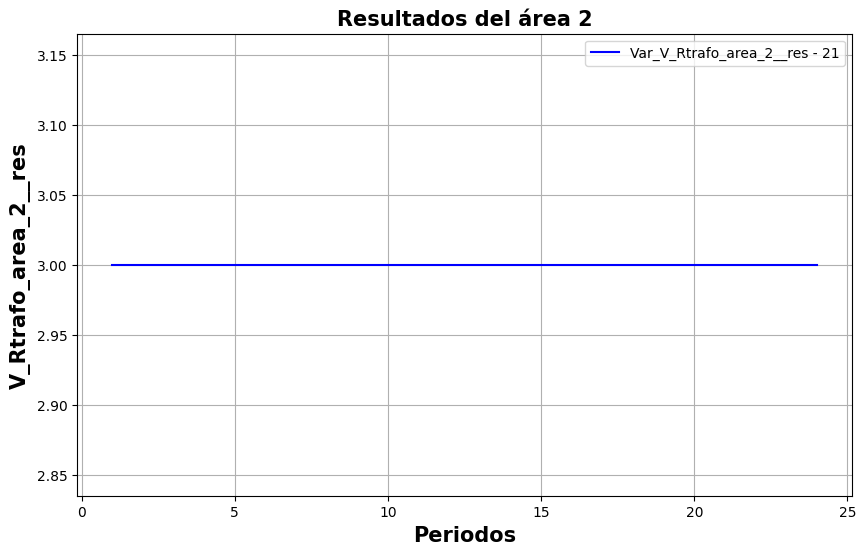

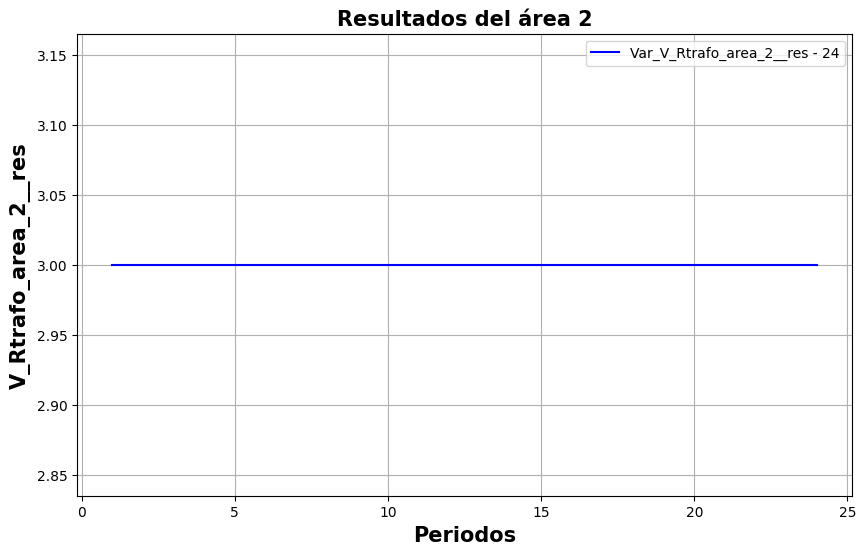

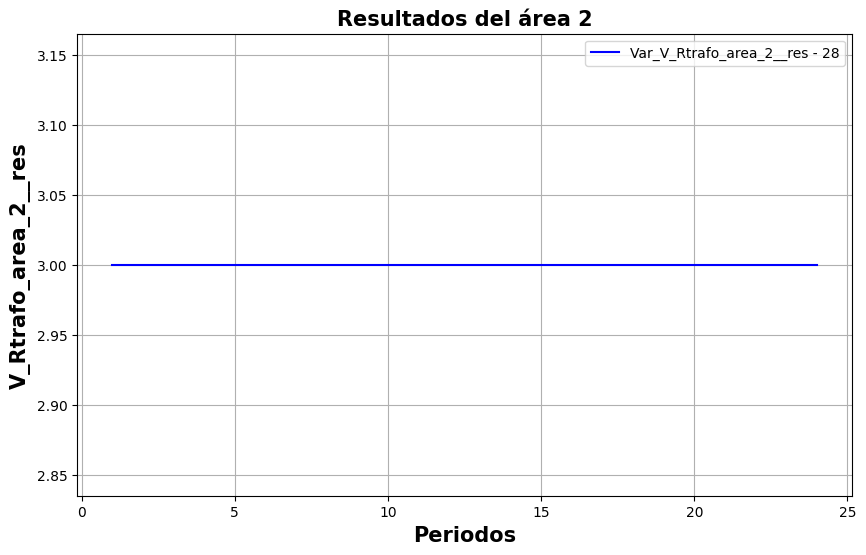

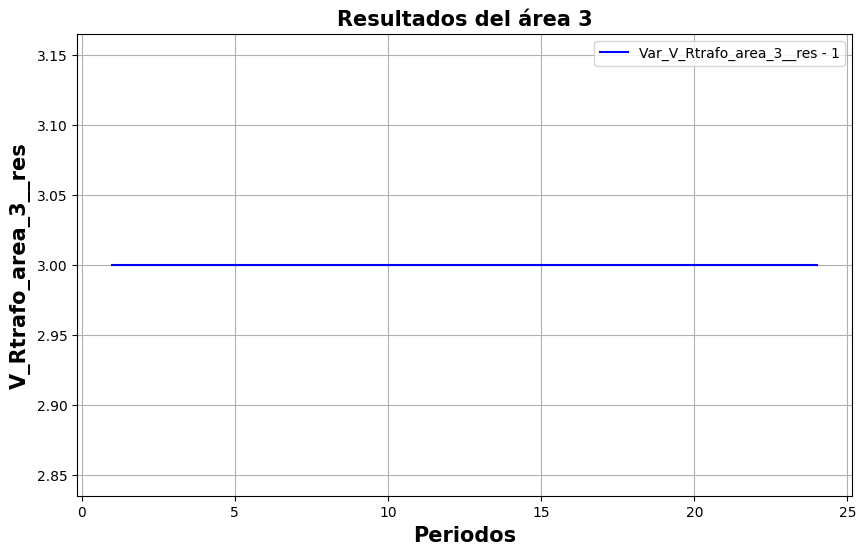

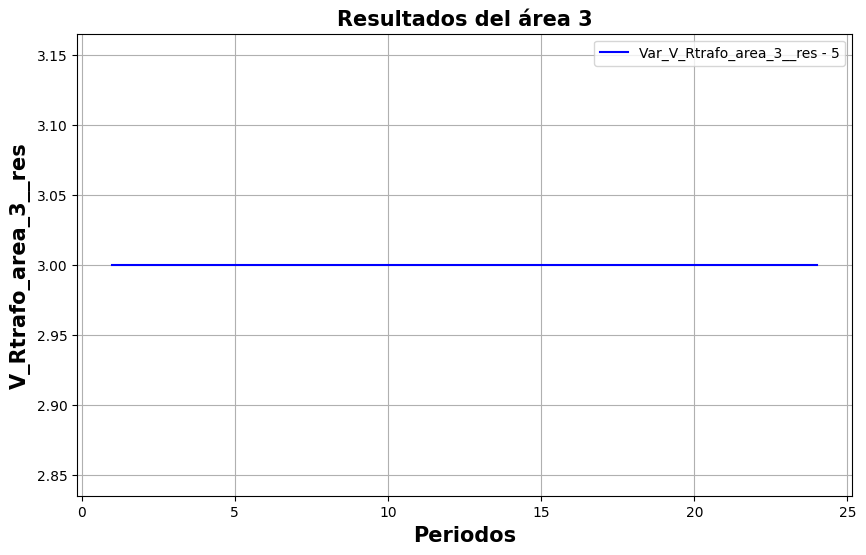

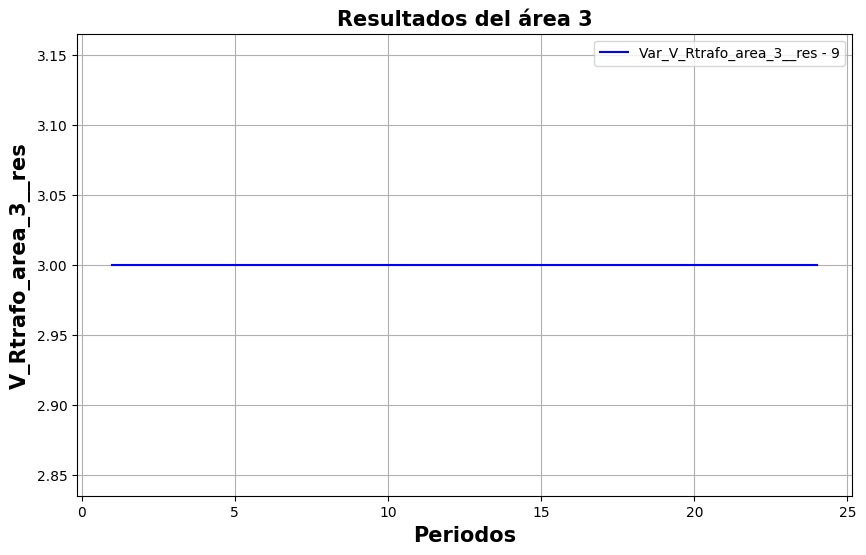

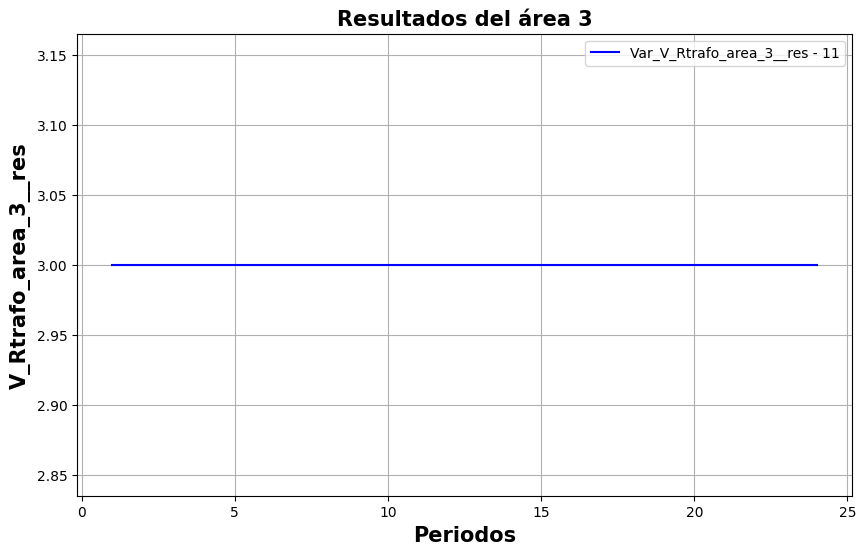

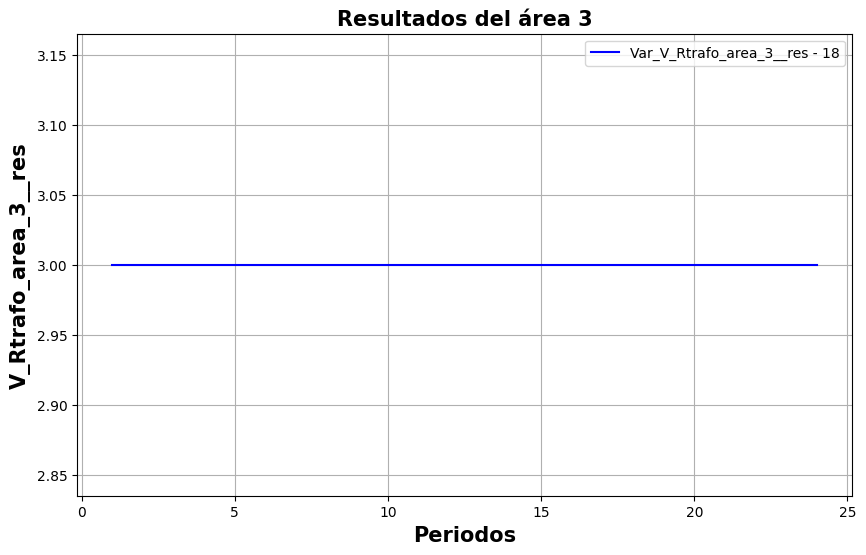

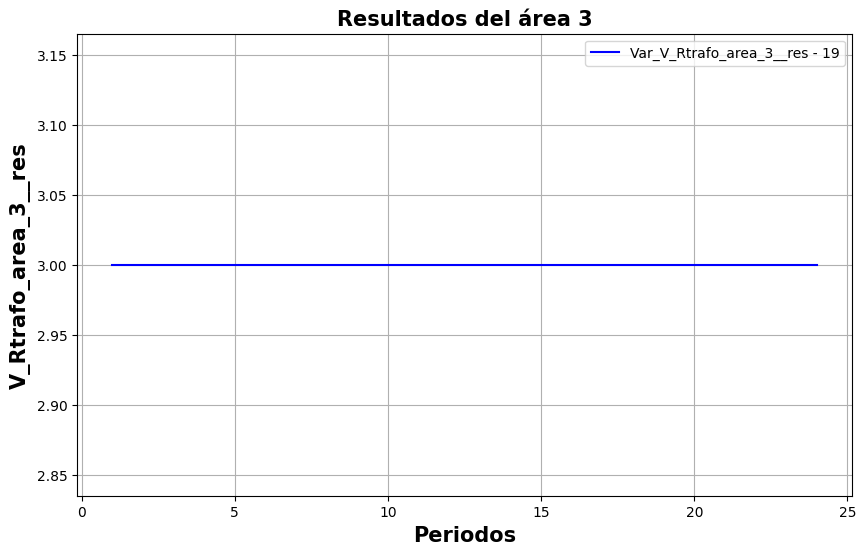

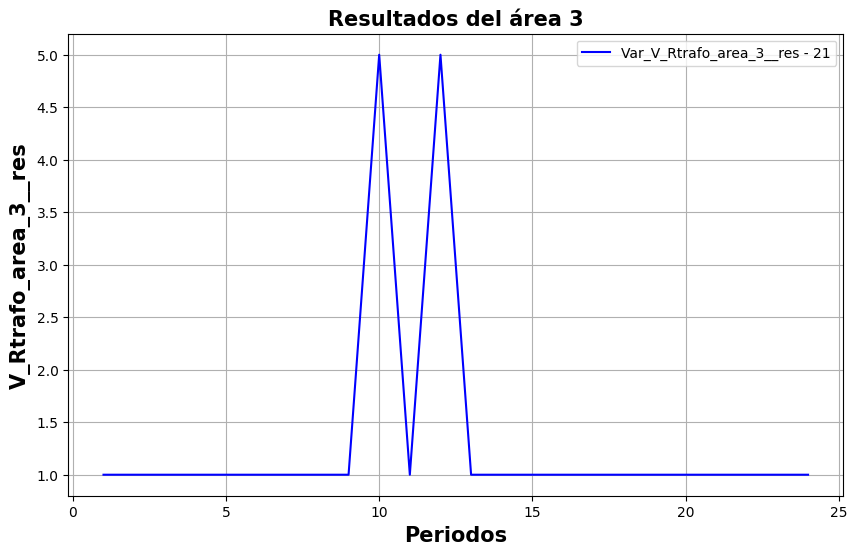

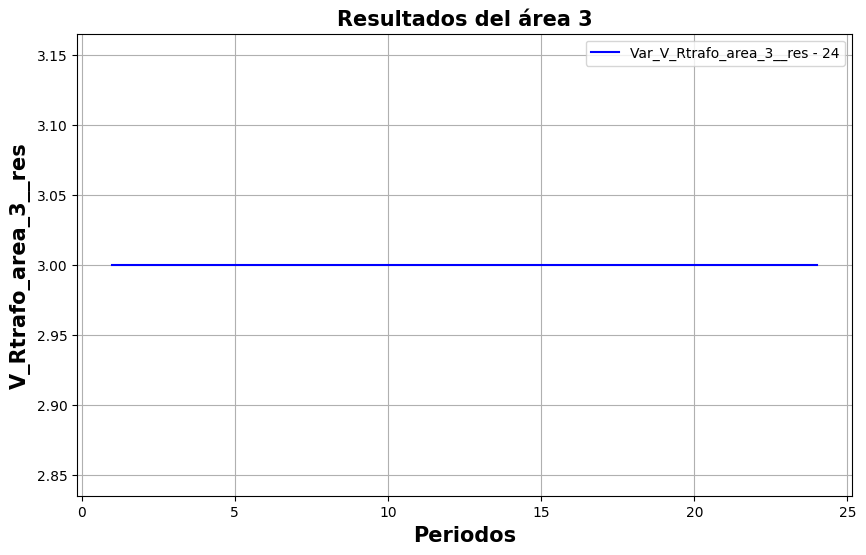

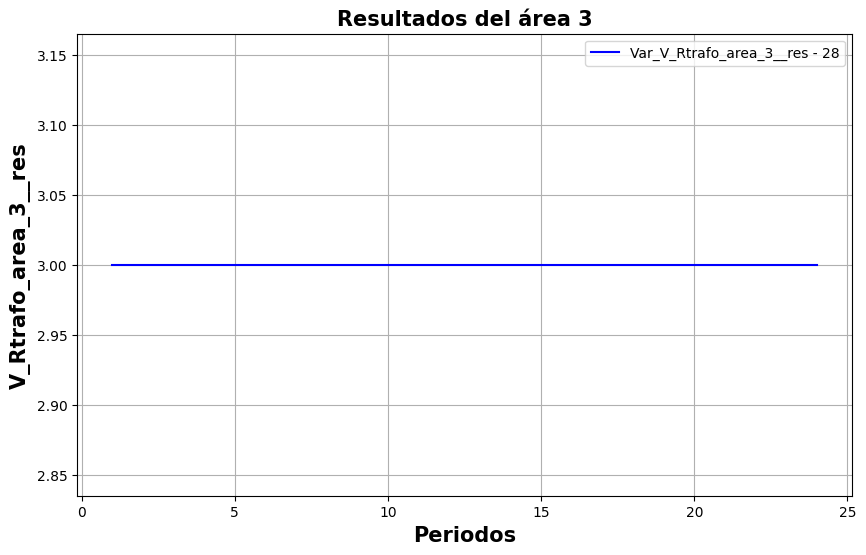

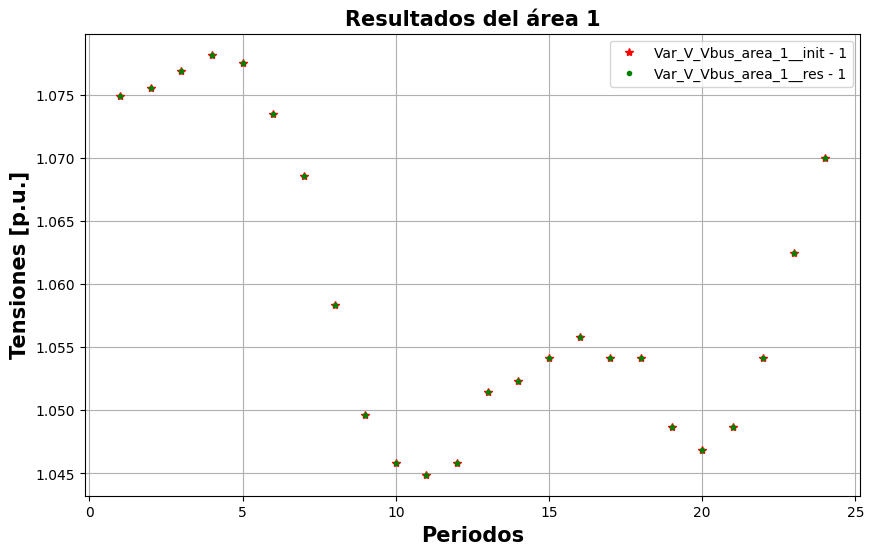

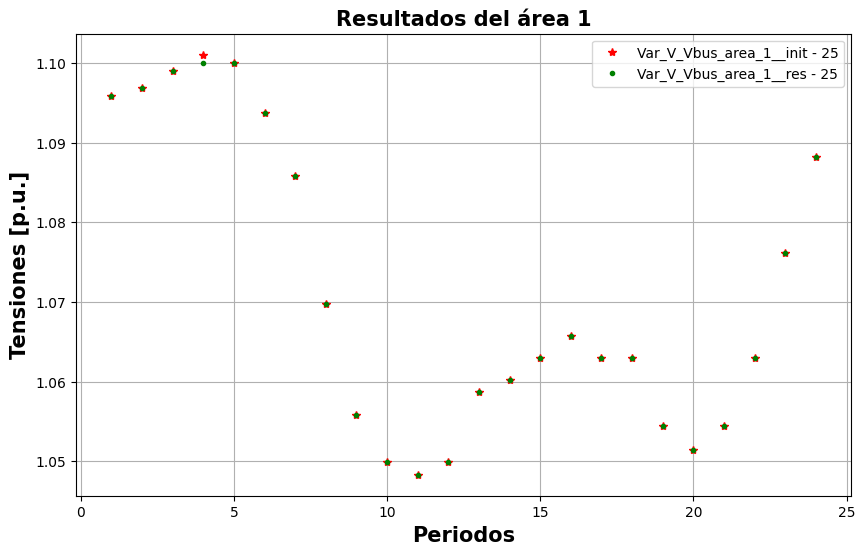

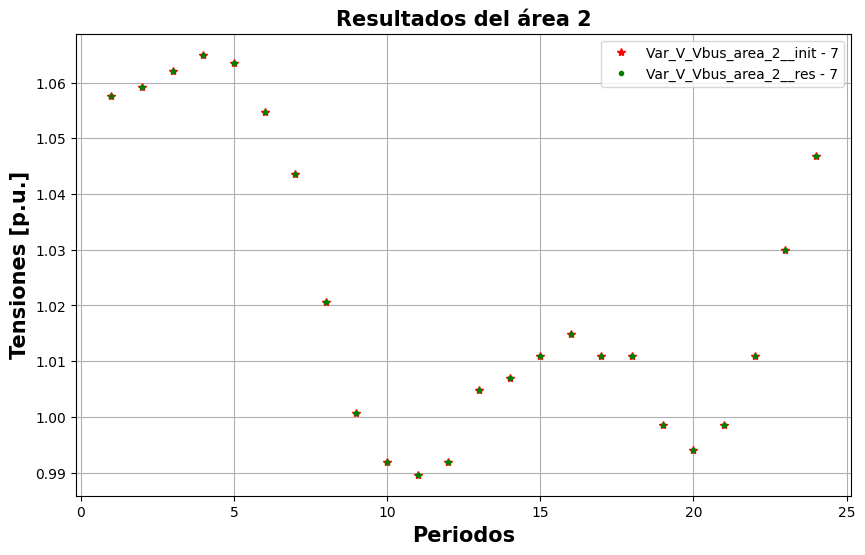

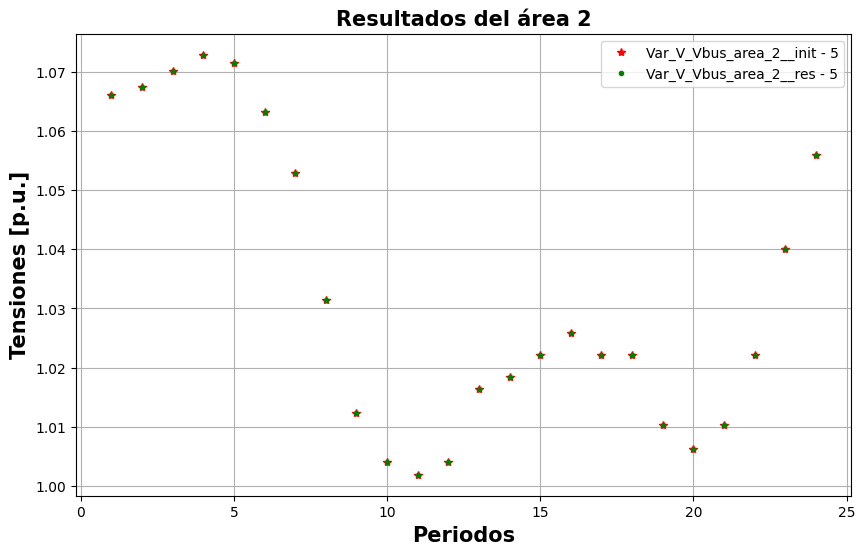

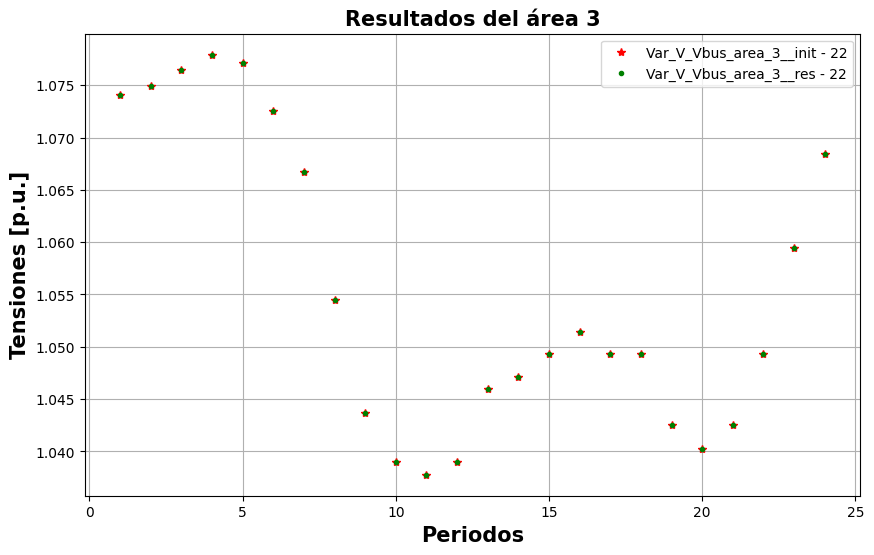

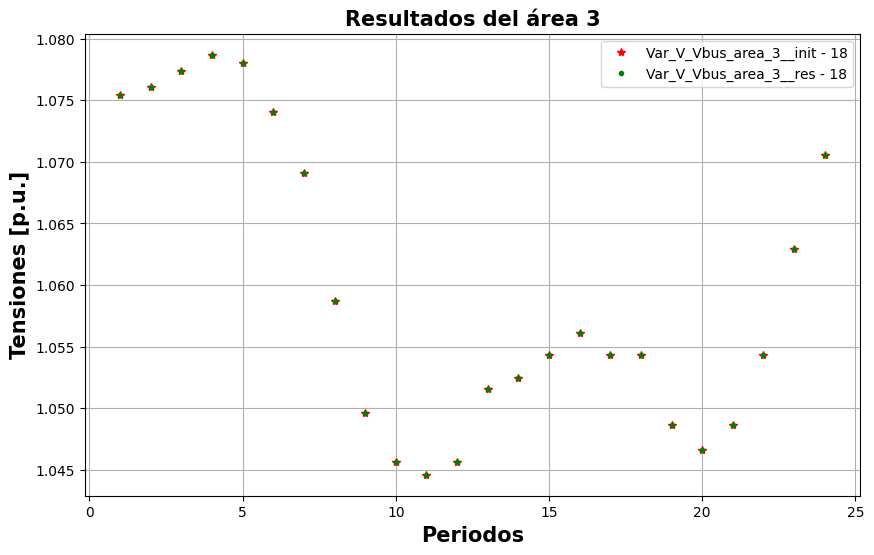

In [60]:
# graficamos
folder = r'\\wsl.localhost\Ubuntu\home\nensanc\GitHub\PowerSystem\ResultadosAreas\Graficas'
system = ['ieee9', 'ieee39', 'ieee57', 'ieee118'][1]
list_var = ['Var_V_Qgen','Var_V_Shunt', 'Var_V_Rtrafo','Var_V_Vbus']
for var in list_var:
    res = get_df(var, system)
    if var=='Var_V_Vbus':
        graph_plot_2(res, system, folder)
    elif var in ['Var_V_Shunt', 'Var_V_Rtrafo']:
        graph_plot(res, system, folder)
    else:
        graph_bar(res, system, folder)